<a href="https://colab.research.google.com/github/cunhajessica/Previsao_Seguro_de_Vida/blob/main/Prevendo_o_valor_do_Seguro_de_Vida_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
By Jéssica Cunha

---

###**O que você vai ver neste projeto?**
*   O que é o **seguro de vida** e como ele é calculado.
*   Um relatório automatizado de análise exploratória dos dados (**Pandas_profiling**).
*   Como utilizar o **Pycaret** com Auto Machine Learning (AutoML) para **prever o valor do seguro de vida.**
*   O que é um algoritmo de **Regressão** e algumas de suas **métricas**. 

#**Prevendo o valor do Seguro de Vida**

Quando se fala em Seguro, logo pensamos em seguro para carros, mas o seguro de vida tem se tornado mais popular nos últimos anos. Segundo a Superintendência de Seguros Privados (SUSEP), os adeptos a contratação do serviço cresceu 17,4% no páis, em 2021. E o número de buscas no Google por seguro de vida, cresceu 150% em abril de 2021, comparado ao mesmo período de 2020. 
Não só as seguradoras, mas muitos bancos tem oferecido esse tipo de serviço, principalmente nesse cenário de muitas doenças virais, como o Covid-19, por exemplo.

<p align="left"><img src="https://t4.ftcdn.net/jpg/04/99/41/85/240_F_499418554_lKT1eHT4tTnYp8qCvB0R7hakyb3aLEAd.jpg" width="60%"></p>



###**O que é o Seguro de vida e como ele é calculado?**
O valor de um seguro de vida é a somatória do custo de todos os riscos com despesas operacionais, impostos e a rentabilidade que a seguradora deseja ter. Basicamente, este estudo é o que determina o valor da contribuição que o segurado fará todo mês. 

Os valores mensais que o segurado irá pagar pode variar muito, porque não existe uma tabela fixa de valores de um seguro de vida. No entanto, alguns aspectos são relevantes e fazem o preço variar:

**Idade:** Quanto mais avançada a idade, maior será o preço. O preço do seguro, também chamado de “prêmio”, costuma aumentar de acordo com a idade do segurado.

**Histórico médico:** Em alguns casos, ao contratar um seguro de vida, é preciso informar doenças pré-existentes, histórico médico familiar, hábitos, prática de exercícios e eventuais vícios, por exemplo. Além disso, também podem ser solicitado exames médicos que comprovem tais declarações.

**Renda mensal:** Esta informação é importante porque é a partir dela que as seguradoras oferecem um seguro compatível para o padrão de vida da pessoa segurada e de sua família.

**Profissões:** Em alguns casos, o valor do seguro de vida pode ficar mais caro, porque algumas profissões oferecem maior risco ao profissional.

O custo do seguro depende também, da cobertura oferecida pela [apólice](https://mag.com.br/blog/educacao-financeira/artigo/o-que-e-apolice-de-seguro-de-vida). Geralmente, quanto maior a cobertura, maior o prêmio, ou seja, o custo para o cliente.

### **Obtenção dos dados**

Os dados foram obtidos através da plataforma do Kaggle, nomeados como: [Health Insurance Cost Prediction](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). Não há muitas informações a respeito desse dataset, assim como, o significado das variáveis. No entanto, através de pesquisas sobre o modelo de negócio de seguros, foi possível interpretar as variáveis e seguir com as análises.

### Dicionário das variáveis:

* `age` - Idade
* `sex` - Gênero
* `bmi` - Índice de massa corporal - IMC
* `children` - Quantidade de filhos do segurado
* `smoker` - Informa se o segurado é Fumante
* `region` - Região do segurado
* `charges` - Valor cobrado pelo seguro de vida

###**Análise Exploratória dos dados**

Nessa etapa estaremos verificando a correlação dos dados, as quantidades estatísticas, como as informações estão distribuídas etc. Através desta análise, poderemos entender um pouquinho mais sobre os dados e partir para as previsões com machine learning.

In [ ]:
# importando pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignorar as warnings
import warnings
warnings.filterwarnings('ignore')

Conforme podem ver abaixo, os dados foram disponibilizados no Github para facilitar no momento da reprodução deste dataset.

In [ ]:
# carregando o conjunto de dados
data = pd.read_csv("https://raw.githubusercontent.com/cunhajessica/Previsao_Seguro_de_Vida/main/insurance.csv")

In [ ]:
# verificando os dados
print("Linhas: ",data.shape[0],"\nVariáveis: ", data.shape[1])
data.head()

Linhas:  1338 
Variáveis:  7


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O conjunto de dados possui 1338 linhas e 7 colunas. Cada linha representa uma pessoa que adquiriu o seguro de vida.

Abaixo, vamos verificar os tipos de cada variável. É importante que esteja de acordo com o que significam, como a variável `age`, por exemplo, que está como números inteiros e não como números reais (float).

In [ ]:
#tipos de cada variável
pd.DataFrame(data.dtypes, columns=['Tipo da Variável'])

,Tipo da Variável
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Para descobrirmos um pouco mais sobre os dados, vamos usar o Pandas Profiling.

**O que é o Pandas Profiling?**
É uma biblioteca open source, que permite a elaboração de análises exploratórias com códigos simples (conforme abaixo).Com ela, podemos gerar um relatório em html sobre nossos dados, de forma rápida e prática, usando pouquíssimas linhas de código.

## *Obs.: O GitHub impede a execução do relatório dinâmico do Pandas Profiling por questão de processamento, caso queira verificar o relatório completo, por favor veja o projeto diretamente pelo [Colab](https://colab.research.google.com/drive/15dZuFkKnawNt2CD-bq95z86eFNCGw3zN?usp=sharing).*

In [ ]:
#istalando pacotes para o pandas_profiling
!pip install pandas_profiling --upgrade -q
!pip install markupsafe==2.0.1 -q

     |████████████████████████████████| 38.1 MB 344 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
pycaret 2.3.5 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
#importar pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
#criar ProfileReport
report = ProfileReport(data)

#criar visualização iframe
report.to_notebook_iframe()


**O que podemos verificar no relatório gerado pelo Pandas Profiling?**


* O dataset **não possui dados nulos**.
* **Variável `age`:** A idade **mínima é 18 anos** e a **máxima 64 anos**. 75% dos segurados possuem idade abaixo de 51 anos.
* **Variável `sex`:** O gênero dos segurados estão bem próximos. Contém 676 homens e 662 mulheres. 
* **Variável `bmi`:** O IMC é bem variado. Possui valor mínimo de 15,96 e máximo de 53,13. 75% dos segurados possuem IMC abaixo de 34,69.
* **Variável `children`:** 574 segurados não possuem filhos (42,9%). A quantidade máxima de filhos é 5. 18 segurados possuem 5 filhos (1,3%). 24,2% dos segurados possuem apenas 1 filho.
* **Variável `smoker`:** 1064 segurados **não fumam (79,5%)**. 274 segurados são **fumantes (20,5%)**.
* **Variável `region`:** Os segurados estão em 4 regiões distintas: southeast (sudeste), southwest (sudoeste), northwest (noroeste) e northeast (nordeste). Conforme o pandas profiling, podemos ver abaixo a porcentagem correspondente a cada região.

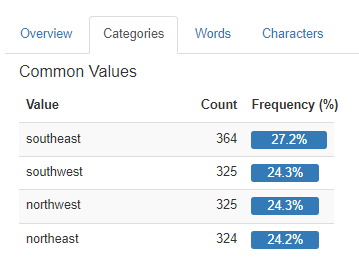

* **Variável `charges`:** Refere-se ao valor cobrado pelo seguro. O valor mínimo é de 1.121,87 e o máximo 63.770,42. 75% dos segurados tem um valor abaixo de 16.639,91. A soma total dos pagamentos está em torno de 17 milhões.

* No pandas profiling as variáveis **`age`** e **`smoker`**, são as que mais tem **correlação** com o valor do **seguro de vida**. Isso já era esperado, uma vez que quando mais idade a pessoa tem, maior é a chance de contrair alguma doença que leve a óbito. Assim como o uso de cigarros. 

Abaixo vamos plotar a matriz de correlação das variáveis numéricas, com os valores, para identificarmos com mais clareza a correlação entre elas.


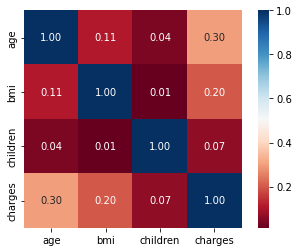

In [ ]:
#criar uma matriz de correlação
matriz_de_correlacao = data[['age', 'sex', 'bmi','children', 'smoker', 'region', 'charges']].corr()

#plotar um heatmap a partir das correlações
sns.heatmap(matriz_de_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Quanto mais próximo de 1 estiver, significa que maior é a suas relações estatísticas. O aumento de uma, está relacionado ao aumento de outra. 1 = 100%. Na matriz podemos observar que a maior correlação é de 0.3 (30%), ou seja, não é tão forte, apesarde ser relevante.


*O objetivo deste projeto é desenvolver um modelo de machine learning capaz de prever os valores que devem ser cobrados pela seguradora com a menor taxa de erro possível.*

Como queremos prever o valor que será cobrado na apólice, a nossa variável alvo será a variável `charges`. Os valores são previstos utilizando como base os valores já existentes no conjunto de dados, devido a isso, são chamados de modelos [supervisionados](https://didatica.tech/aprendizado-supervisionado-ou-nao-supervisionado/). Especificamente um modelo supervisionado de [Regressão - clique aqui para saber mais](https://medium.com/ensina-ai/regress%C3%A3o-linear-simples-4cac67c4488c) .


Neste projeto utilizaremos o **PyCaret**, uma biblioteca open-source e low-code de auto machine learning. Esta ferramenta permite criar modelos de machine learning do início ao fim, com poucas linhas de código, reduzindo o tempo entre o ciclo de hipóteses e os insights que se tem nos projetos.

##**Divisão dos dados**

Para iniciarmos a contrução do nosso modelo, vamos separar os dados em treino e teste.

*   **Dados de treino:** serve para treinar o modelo.
*   **Dados de teste:** usado somente no final, depois de o modelo estar pronto e otimizado, para ver a real performance deste modelo.

In [ ]:
# separando os dados em teste e treino
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificando o formato dos conjuntos
print('Dados de treino: {}'.format(train.shape))
print('Dados de teste: {}'.format(test.shape))

Dados de treino: (1204, 7)
Dados de teste: (134, 7)


Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da ferramente e das ferramentas dependentes. Apesar das mensagens de erro, isso não impacta no desempenho do pycaret.

In [ ]:
# instalando as bibliotecas necessarias para o pycaret
!pip install pycaret==2.3.5 -q
!pip install pyyaml==5.4.1 -q
!pip install jinja2 -q
!pip install markupsafe==2.0.1 -q
!pip install scipy==1.2 --upgrade -q
from markupsafe import soft_unicode
import jinja2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.5.4 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
pyod 1.0.4 requires scipy>=1.5.1, but you have scipy 1.2.0 which is incompatible.
pymc3 3.11.5

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
# importando o pacote de regressão do pycaret
from pycaret.regression import *

A função `setup()` é o primeiro passo ao executar o PyCaret, ela inicializa o ambiente no PyCaret e cria o pipeline de transformação para preparar os dados para o nosso modelo. 

Ela recebe dois parâmetros obrigatórios: Um dataframe do pandas e o nome da coluna alvo. Todos os outros parâmetros são opcionais, e são usados para customizar o pipeline de pré-processamento.

Ao rodar a célula o PyCaret oferece uma tabela mostrando as features e seus tipos inferidos, após a execução do `setup()`. Caso todos os tipos estejam corretos, podemos seguir em frente apertando a tecla enter. Caso contrário, deve-se digitar quit no espaço disponibilizado.

In [ ]:
#criando o pipeline
reg = setup(data = train, target = 'charges', normalize = True, session_id=7)

,Description,Value
0,session_id,7
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='charges')),
    

Após fazer o pipeline, utilizamos a função `compare_models()`.
Essa função treina todos os modelos na biblioteca do PyCaret e os avalia usando  [cross-validation](https://towardsdatascience.com/cross-validation-430d9a5fee22), com número de folds iguais a 10, número que pode ser alterado, para calcular a média das métricas. 

A comparação é feita utilizando os valores padrão dos hiperparâmetros de cada modelo, imprimindo uma tabela que mostra as principais métricas para avaliação. 

Veja abaixo as principais [métricas para o modelo de regressão](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96):

*   **MAE (Mean Absolute Error)** - mostra a média de erro em valores absolutos.
*   **MSE (Mean Squared Error)** - calcula o erro Quadrático Médio.
*   **RMSE (Root Mean Squared Error)**  - calcula a Raiz do Erro Quadrático Médio.
*   **R2 Score (Coefficient of Determination)** - calcula qual a porcentagem da variança que pôde ser prevista pelo modelo de regressão.
*   **RMSLE (Root Mean Squared Log Error)** - calcula a raiz do erro quadrático médio do logaritmo dos valores.
*   **MAPE (Mean Absolute Percentage Error)** - mostra a média do erro absoluto em valores percentuais.

Neste caso, iremos levar em consideração a métrica **MAE**, para verificarmos o quanto os valores previstos estão próximos dos valores da base de dados. O parâmetro `sort` ordena de forma crescente os modelos pela métrica MAE. As casas decimais são definidas pelo parâmetro `round`, por padrão ele mostra 4 casas decimais

###**Comparando os modelos**

In [ ]:
# comparando os modelos
best = compare_models(sort='MAE',round=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2313.65,1.859925e+07,4278.43,0.87,0.42,0.28,0.06
et,Extra Trees Regressor,2349.84,2.232241e+07,4688.99,0.84,0.44,0.27,0.54
rf,Random Forest Regressor,2351.50,1.996534e+07,4446.20,0.86,0.44,0.29,0.60
lightgbm,Light Gradient Boosting Machine,2558.78,2.007812e+07,4451.81,0.86,0.49,0.32,0.09
dt,Decision Tree Regressor,2659.29,3.366964e+07,5787.06,0.76,0.51,0.35,0.03
huber,Huber Regressor,3266.53,4.621322e+07,6780.72,0.68,0.44,0.21,0.04
par,Passive Aggressive Regressor,3565.64,4.594685e+07,6723.96,0.68,0.44,0.19,0.08
ada,AdaBoost Regressor,3708.19,2.377095e+07,4857.42,0.83,0.61,0.68,0.02
llar,Lasso Least Angle Regression,4117.85,3.432761e+07,5840.44,0.76,0.56,0.44,0.01
lasso,Lasso Regression,4123.45,3.436298e+07,5843.57,0.76,0.57,0.44,0.01


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Ao final da tabela, em "logs", podemos observar todas as características  do melhor modelo.

Como mencionamos acima, utilizamos a métrica **MAE** para a avaliação, porque queremos que os valores previstos tenham o menor erro possível, em relação aos valores testados, ou seja, quanto mais próximo de zero melhor.

Como podemos observar os modelos que tiveram o melhor desempenho baseado nessa métrica, foram o **Gradient Boosting Regressor (gbr)**, **Extra Trees Regressor (et)** e o **Random Forest Regressor (rf)**. Estaremos instanciando esses modelos para posterior otimização dos parâmetros.

###**Instanciando os modelos**

Apesar do `compare_models()` ser uma função poderosa, e normalmente um excelente ponto de partida, ela não retorna modelos treinados. O workflow recomendado pelo PyCaret é usar o compare_models logo após o setup para avaliar os modelos que performam melhor com o conjunto de dados e selecionar alguns candidatos para seguir experimentando. Como mencionamos acima, iremos criar os modelos Gradient Boosting Regressor e o Random Forest Regressor.

A média apresentada aqui é a mesma que vimos no `compare_models` anteriormente. Isso porque o modelo é criado e avaliado da mesma forma que fizemos anteriormente.

Assim como no compare_models, no `create_model`, por padrão ele utiliza 10 fold, é possível mudar a quantidade de folds com uma validação cruzada conforme o valor desejado, porém, quanto mais folds for utilizado, mais lento será o processamento da operação.

In [ ]:
# instanciando o modelo Gradient Boosting Regressor
gbr = create_model('gbr', round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2597.76,21416792.46,4627.83,0.88,0.42,0.29
1,1861.27,11791993.14,3433.95,0.92,0.35,0.27
2,2067.73,15143891.17,3891.52,0.91,0.32,0.24
3,2190.72,17396711.66,4170.94,0.85,0.42,0.24
4,2605.29,23007337.35,4796.60,0.85,0.55,0.28
5,2103.18,11855121.12,3443.13,0.89,0.43,0.39
6,2104.65,15984483.44,3998.06,0.88,0.31,0.25
7,2579.99,24878550.84,4987.84,0.84,0.45,0.32
8,2360.71,21479339.86,4634.58,0.87,0.42,0.27
9,2665.20,23038262.67,4799.82,0.80,0.51,0.32


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# instanciando o modelo Extra Trees Regressor
et = create_model('et', round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2214.77,18909534.76,4348.51,0.89,0.41,0.24
1,1883.62,13794272.76,3714.06,0.90,0.41,0.30
2,2529.49,26233740.76,5121.89,0.85,0.43,0.32
3,2031.18,15118385.71,3888.24,0.87,0.37,0.21
4,2575.78,27644796.87,5257.83,0.82,0.62,0.28
5,2274.50,19189804.41,4380.62,0.82,0.39,0.29
6,2204.45,20249323.23,4499.92,0.85,0.34,0.24
7,2761.00,30328086.48,5507.09,0.81,0.50,0.34
8,2611.13,26982514.33,5194.47,0.84,0.44,0.27
9,2412.47,24773628.17,4977.31,0.79,0.52,0.24


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# instanciando o modelo Random Forest Regressor.
rf = create_model('rf', round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2429.36,19359853.81,4399.98,0.89,0.42,0.26
1,2011.41,13270445.49,3642.86,0.91,0.40,0.33
2,2297.10,19750012.01,4444.10,0.88,0.36,0.26
3,2359.84,17884063.63,4228.96,0.84,0.43,0.30
4,2385.60,23647920.67,4862.91,0.84,0.61,0.27
5,2153.17,14699241.93,3833.96,0.87,0.40,0.32
6,2149.00,18353755.94,4284.13,0.87,0.35,0.25
7,2372.01,24672063.74,4967.10,0.85,0.46,0.31
8,2680.71,23143188.54,4810.74,0.86,0.46,0.32
9,2676.77,24872821.24,4987.27,0.79,0.53,0.31


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### **Tuning dos Modelos**

Quando um modelo é criado usando o `create_model()` ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função `tune_model()`. Nesse caso, as iterações são passadas pelo parâmetro `n_inter`, que por padrão são 10, como fold, em `create_model()`. O parâmetro `optimize`, tem por padrão a métrica R2, então neste caso, devemos obrigatoriamente mudar para MAE.

In [ ]:
# tuning de parâmetros do modelo Gradient Boosting Regressor
tuned_gbr = tune_model(gbr, optimize='MAE', round=2)

NameError: ignored

In [ ]:
# tuning de parâmetros do modelo Extra Trees Regressor
tuned_et = tune_model(et, optimize='MAE', round=2)

In [ ]:
# tuning de parâmetros do modelo Random Forest Regressor.
tuned_rf = tune_model(rf, optimize='MAE', round=2)

### **Modelo Gradient Boosting Regressor**

Basicamente, podemos dizer, em termos simples, que o modelo [Gradient Boosting Regressor](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) vai aprendendo com os erros e melhorando a cada passagem. Ele utiliza árvores de decisão e a cada novo "nó" gerado, leva em consideração os erros para a construção da próxima árvore, melhorando cada vez mais os resultados.

O PyCaret possui também, a função `plot_model()`, que permite plotar visualizações sobre a performance do nosso modelo. No gráfico abaixo podemos observar as variáveis de maior importância para o modelo. Para o Gradient Boosting Regressor, a variável de maior relevância é a que menciona se o cliente é fumante ou não.



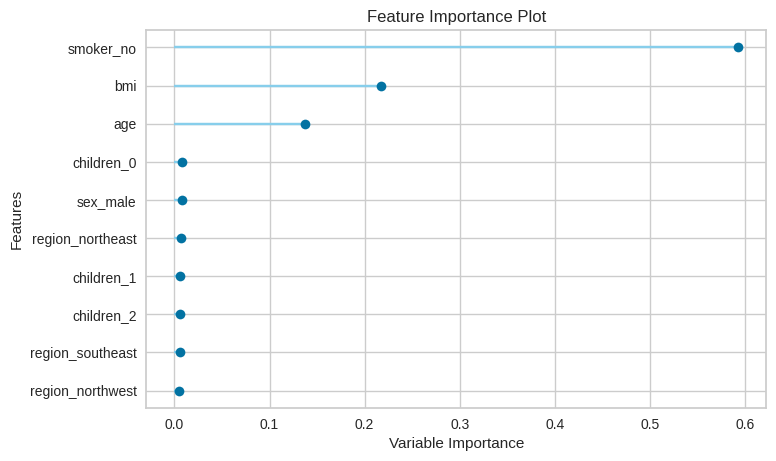

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_gbr, plot='feature')

### **Modelo Extra Trees Regressor**

O algoritmo de machine learning ExtraTrees cria muitas árvores de decisão de maneira aleatória, para então através da combinação dos resultados de cada árvore encontrar o resultado final. Seu principal diferencial está no fato deste processo ser extremamente aleatório, contribuindo assim para modelos mais generalizáveis. Ele é parecido com o modelo Random Forest Regressor, porém, mais aleatório que ele, por fazer mais divisões entre os resultados.


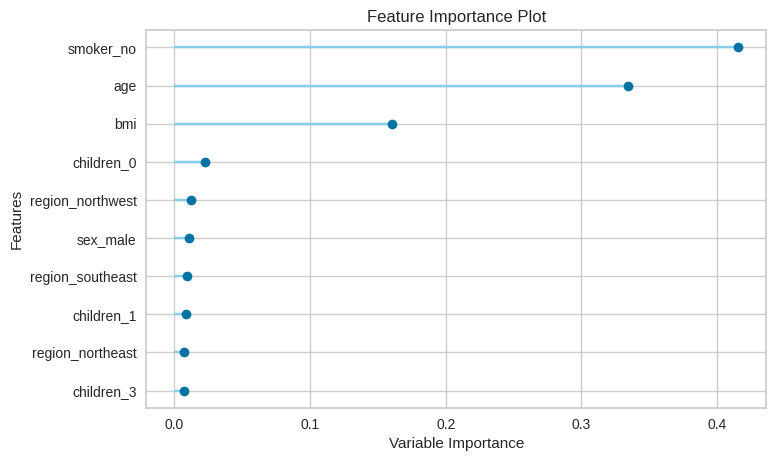

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_et, plot='feature')

### **Modelo Random Forest Regressor**

Em português, Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo, que irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore, com o seu aprendizado individual, será utilizada na escolha do resultado final.

No gráfico abaixo podemos observar as variáveis de maior importância para o modelo. Para o Random Forest Regressor, a variável de maior relevância também é a que menciona se o cliente é fumante ou não.

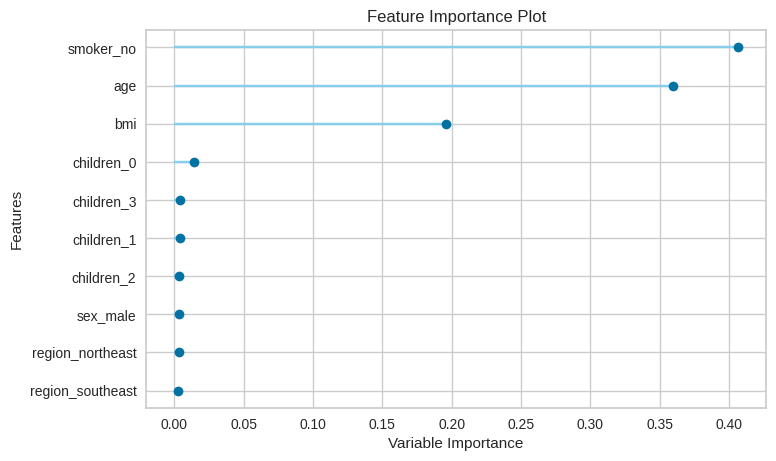

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_rf, plot='feature')

### **Avaliação Interativa dos Modelos**

Vale ressaltar que há outra forma de analizar a performance dos modelos, que é usar a função `evaluate_model()`, que retorna uma interface para todos os plots disponíveis para cada modelo, conforme demonstrado no exemplo abaixo. Internamente, essa função usa a função que mostramos anteriormente, `plot_model()`.

In [ ]:
# avaliando o modelo rf
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### **Verificando o resultado de cada modelo**

---



Essa análise é feita para que possamos escolher o melhor modelo para utilizar nos dados de teste. Para isso utilizamos a função `predict_model()`, do PyCaret.

In [ ]:
# fazendo previsões no modelo gbr
predict_model(tuned_gbr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=10, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=180,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2851.2058,2.887382e+07,5373.4369,0.8084,0.51,0.3421


In [ ]:
# fazendo previsões no modelo et
predict_model(tuned_et);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae', max_depth=8,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.5, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=270, n_jobs=-1,
                    oob_score=False, random_state=7, verbose=0,
                    warm_start=False), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2315.3693,2.550195e+07,5049.9456,0.8308,0.3789,0.1587


In [ ]:
# fazendo previsões no modelo rf
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2151.888,2.438734e+07,4938.3544,0.8382,0.3876,0.1628


Como podemos observar o modelo Random Forest Regressor, teve um melhor desempenho, com um valor de MAE, menor que os demais.
O último passo será utilizar a função `finalize_model()` com o objetivo de treinar o modelo em todo o conjunto de dados inicial de treino, antes de ser feito o deploy para produção.

In [ ]:
# finalizando o modelo que será utilizado
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
         

##**Prevendo os Custos de Seguro de Vida**

Anteriormente separamos o conjunto de dados em treino e teste. Construímos o modelo utilizando os dados de treino, porém agora, com os dados de teste que ainda não foram vistos, veremos a real performance do modelo.

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_rf, data=test)
unseen_predictions.head().round(2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,age,sex,bmi,children,smoker,region,charges,Label
0,18,male,23.21,0,no,southeast,1121.87,1562.57
1,60,male,24.32,1,no,northwest,13112.60,14970.73
2,48,female,25.85,3,yes,southeast,24180.93,23804.93
3,48,female,28.90,0,no,southwest,8277.52,9167.93
4,63,male,30.80,0,no,southwest,13390.56,13929.84


A coluna `Label` é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo RF.

Para uma melhor visualização das previsões do modelo que criamos, podemos utilizar um gráfico de linhas. Nesse gráfico os dados reais (azul) e os dados previstos (laranja) são sobrepostos, e quanto mais sobrepostos estiverem, melhor foram as previsões.

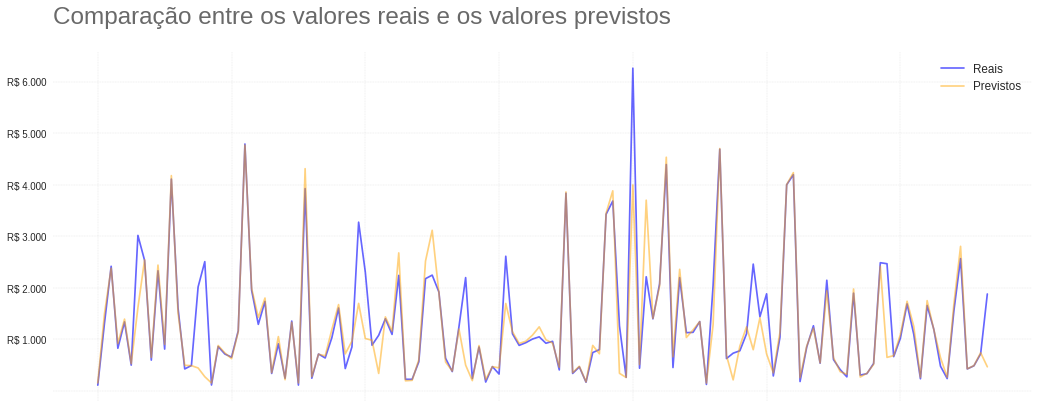

In [ ]:
#criando a figura
fig,ax = plt.subplots(figsize=(15,6),dpi=70)

#gráfico
unseen_predictions.charges.plot(color='blue',alpha=0.6,ax=ax)
unseen_predictions.Label.plot(color='orange',alpha=0.5,ax=ax);

#layout do gráfico
ax.set_frame_on(False)
ax.grid(linestyle='-.',lw=0.25,aa=True)
ax.legend(['Reais','Previstos'],loc='best',fontsize=12)
ax.set_title('Comparação entre os valores reais e os valores previstos',loc='left',pad=30,fontdict={'fontsize':25},color='dimgrey')
ax.set_xticklabels([])
valores = [0,'','R$ 1.000','R$ 2.000','R$ 3.000','R$ 4.000','R$ 5.000','R$ 6.000', 'R$ 7.000']
ax.set_yticklabels(labels=valores,fontdict={'fontsize':10})

#plotando o gráfico
plt.tight_layout();

Além do gráfico vamos verificar através ds dados estatísticos a diferença percentual entre os dados previstos e os dados reais.

In [ ]:
#verificando os dados reais e previstos
unseen_predictions['Diferença (%)'] = abs(((unseen_predictions.Label - unseen_predictions.charges)/unseen_predictions.charges)*100)
unseen_predictions['Erro absoluto'] = abs(unseen_predictions.Label - unseen_predictions.charges)
unseen_predictions[['Diferença (%)','Erro absoluto']].describe().round(2)

,Diferença (%),Erro absoluto
count,134.00,134.00
mean,16.23,2419.37
std,21.24,4783.49
min,0.05,2.29
25%,2.90,253.00
50%,7.90,518.28
75%,16.78,1398.09
max,89.00,22638.29


Como podemos observar a média está com um percentual de diferença baixo (16,23%), porém, o erro absoluto está bem alto (em R$ 2.419,37). Isso pode ter ocorrido por termos utilizado os outliers na construção do modelo.

#**Conclusões**

*   O modelo ainda pode ser melhorado, porém, a ferramenta Pycaret se mostrou muito eficiente.
*   Nem sempre o melhor modelo na comparação inicial com os demais, continua sendo o melhor entre eles após a otimização dos seus parâmetros.
* A ferramenta Pandas Profiling se mostrou uma forma rápida para verificar informações relevantes do conjunto de dados.
*   Para as previsões do custo do seguro de vida, a variável mais relevante foi a relacionada aos clientes fumantes. As variáveis referente a idade e ao IMC também foram relevantes para as previsões.
*   Seria interessante um dataset com mais dados e mais variáveis, para que pudessemos fazer mais testes.


